# NLP and the Web: Home Exercise 8

In this homework exercise you will create and evaluate an IR system.  For that, you will work on (a subset of) the CISI (http://ir.dcs.gla.ac.uk/resources/test_collections/cisi/) dataset. It comes with queries and documents, both from the computer science domain. It further provides annotation about which document is relevant for which query.

Work through the tasks in order.

Task descriptions assume that you use pandas to store data. You are, however, free to use any other type of storage than dataframes.

## About the data
The data comes in three different files. All of them are `\t` separated:
* *queries.tsv:* consists of two columns.
    * The first column is the `id` (integer value)
    * The second column is the textual query (text)
* *docs.tsv:* consists of three columns.
    * The first column is the `id` (integer value)
    * The second column is the `title` of the document (text)
    * The third column is the `abstract` of the document (text).
* *mapping.tsv: consists of two columns.*
    * The first column is the `id` of the query (integer)
    * The second column is the `id` of a relevant document for that query (integer)
    
Note that relevant documents do not exist for all queries, and that one document may be relevant to multiple queries.

## Task 1: Data Preparation (4 Points)

In general it is good practice to first take a closer look at the actual data you are working on.

**a)** Load all three files of the CISI dataset.

Output the query with `id=13` together with the titles of all articles that are relevant for this query. The printed titles must be ordered (ascending) by the `id` of the articles. How many documents are relevant to this query?

In [98]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


queries = pd.read_csv("queries_400.tsv", sep="\t")
mapping = pd.read_csv("mapping_400.tsv", sep="\t")
df_ = pd.DataFrame(index=index, columns=columns) = pd.read_csv("documents_400.tsv", sep="\t")

doc_nr = mapping.loc[mapping['query_id'] == 13]['doc_id'].sort_values()
result = docs.loc[docs['id'].isin([nr for nr in doc_nr])].sort_values(by="id")
print(result.iloc[:,:2])
print("There are {0} relevant documents".format(len(doc_nr)))

       id                                              title
393    49                 Adaptive Information Dissemination
284    59                                      Opinion Paper
57     75  MEDLARS: Report on the Evaluation of Its Opera...
170    77  The Effectiveness of Automatically Generated W...
135   120       Design and Evaluation of Information Systems
218   153  Criteria for Evaluating Technical Library Effe...
177   223  Document Delivery Capabilities of Major Biomed...
128   309  The SMART Automatic Document Retrieval System ...
297   311       Communication among Scientists and Engineers
312   486  Relevance Assessments and Retrieval System Eva...
295   523  The Cost_Performance of an On-Line, Free-Text ...
181   595  Selected Results From An Inquiry Into Testing ...
71    656  Measures of the Usefulness of Written Technica...
270   696             Computerized Drug Information services
185   702  The CA Integrated Subject File.  II. Evaluatio...
354   705       Comparat

**b)** To understand how many relevant documents we have for all queries, plot a histogram for the distribution of how many queries come with how many relevant articles. Use the `histplot` function from `seaborn` with a `binwidth=5`:

* The x-axis should display the bins (i.e. queries with 0-4 relevant articles, queries with 5-9 relevant articles, ...)
* The y-axis should count how many queries fall into the bins, as displayed on the x-axis.

It is sufficient to prepare the data accordingly and plot it. Your plot should contain meaningful axis descriptions, but you are not required to create a label for every single point on the x-axis/y-axis (You can leave axis labels as they are plotted by `seaborn`).

Print how many queries come without any relevant articles.

In [90]:
l1 = list(set(mapping["query_id"]))
empty_queries = queries[~queries.id.isin(l1)]
print("Number of query without articles: {0}".format(len(empty_queries)))

Number of query without articles: 36


In [189]:
statistic = mapping.groupby("query_id").count().reset_index()
statistic.columns = ["query_id","number of articles"]
l1 = pd.DataFrame([[a,0] for a in empty_queries.id.values],columns =["query_id","number of articles"])
statistic=statistic.append(l1,ignore_index=True)
statistic

,query_id,number of articles
0,1,14
1,2,8
2,3,6
3,4,2
4,5,4
...,...,...
106,105,0
107,106,0
108,107,0
109,108,0


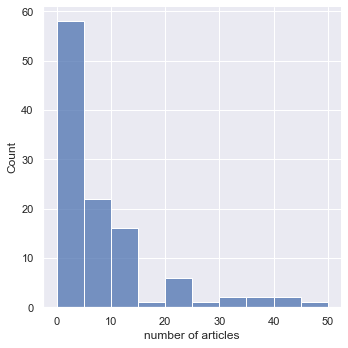

In [89]:
# Create a visualization
sns.displot(data=statistic,x="number of articles", binwidth=5)

**c)** In this exercise we are primarily interested in IR for web retrieval. In the web, we can assume that, due to its size, many documents are relevant for a query. 

Remove all queries for which less then 11 articles are labelled as relevant. Keep all documents  -- even if they are irrelevant for all queries. How many queries are remaining?

**Use this smaller dataset for all subsequent tasks in this Homework**

In [96]:
data_sm = statistic.loc[statistic["number of articles"]>=11].query_id.values
print("Number of queries with more than 11 articles: {0}".format(len(data_sm)))

Number of queries with more than 11 articles: 27


In [123]:
# reduce the dataset 
queries_sm = queries.loc[queries.id.isin(data_sm)]
mapping_sm = mapping.loc[mapping.query_id.isin(data_sm)]

## Task 2: Information Retrieval (5 Points)

**Use the subset of the data from 1c)**

**a)** Preprocessing:
Use spaCy to lemmatize the queries and documents.
* For queries, the `query` field must be lemmatize
* For documents, the concatenation of `title` and `abstract` must be lemmatize. We combine both fields (`title` and `abstract`) to simplify IR, by applying it on this single text for documents.

Store the lemmatized text a a separate column.

Finally print the preprocessed document with `id=1255`


In [125]:
# concat column title with column abstract
docs["text"]=docs["title"]+ " " + docs["abstract"]

In [126]:
import spacy 

nlp = spacy.load('en_core_web_sm')

def lemmatize(text):
    text = text.lower()
    doc = nlp(text)
    result = [token.lemma_ for token in doc]
    return " ".join(result)

queries_sm['query_lemma'] = queries_sm["query"].apply(lemmatize)
docs["text_lemma"] = docs["text"].apply(lemmatize)

c:\users\nguyen\pycharmprojects\nlp4web\venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [127]:
docs_sm

,id,title,abstract,text,text_lemma
1,887,COM Catalog Based on OCLC Records,The production of a COM catalog using OCLC rec...,COM Catalog Based on OCLC Records The producti...,com catalog base on oclc record the production...
4,675,Atom-by-Atom Typewriter Input for Computerized...,Novel features have been added to a paper tape...,Atom-by-Atom Typewriter Input for Computerized...,atom - by - atom typewriter input for computer...
5,1114,Analysis of Information Flows in Shipbuilding ...,Parameters of information flows are identified...,Analysis of Information Flows in Shipbuilding ...,analysis of information flow in shipbuilding a...
6,1128,Free Information of a Social System,The structure of the information field of a so...,Free Information of a Social System The struct...,free information of a social system the struct...
7,972,Graph Model for Library Information Networks,The design and study of library information ne...,Graph Model for Library Information Networks T...,graph model for library information network th...
...,...,...,...,...,...
393,49,Adaptive Information Dissemination,Computer dissemination of information offers s...,Adaptive Information Dissemination Computer di...,adaptive information dissemination computer di...
395,260,Classification Practice in Britain. Report on...,The objectives of the Sub-Committee in startin...,Classification Practice in Britain. Report on...,classification practice in britain . report ...
396,148,Fair (Fast Access Information Retrieval) Proje...,I am going to describe in general terms a rese...,Fair (Fast Access Information Retrieval) Proje...,fair ( fast access information retrieval ) pro...
398,830,Progress in Documentation,This article reviews the state of the art in a...,Progress in Documentation This article reviews...,progress in documentation this article review ...


**b)** Implement the function `compute_cosine_similarity_for_all`. It shall compute the cosine similarity of *all* queries with *all* documents, and add a label describing whether the document is relevant (`True`) to the query or not (`False`). It shall return a new dataframe and represent each `query`-`document` combination as one row.

**Example output:**

In [ ]:
pd.DataFrame({
    'query_id': [99,99], # The same query is compared to ...
    'document_id': [1,2], # ... different documents. In your case to all documents.
    'document_title': ['Learn about IR in NLP4Web', 'Learn about nursing somewhere else'], # You can omit this - document_id is sufficient
    'query': ['Where can I learn more about IR?'] * 2, # You can omit this - query_id is sufficient
    'similarity': [0.349, 0.025], # Cosine similarity (These values are only an example and made up)
    'is_relevant': [True, False] # Gold Labels
})
# For all combinations of (query, document)

The function takes all data (queries, document, mapping) together with the vectorizer as input.
* The vectorizer (`vectorizer`) is a vectorizer (such as `TfidfVectorizer()` from `sklearn`) and converts all texts into vectors.

The method should:
1. Fit the vectorizer *on the documents* (based on the preprocessed column).
2. Compute the vectors for all *queries* using the vectorizer from (1).
3. Compute the cosine similarity between all query- and all document-vectors. You can use the function `cosine_similarity` from `sklearn`.
4. Add label `is_relevant` describing for each combination of query-document whether the document is relevant to the query or not
5. Return the resulting dataframe. Make sure to include at least the ids for document and query, and the two newly introduced columns (`is_relevant`, `similarity`).

Apply the function to all preprocessed queries and all documents using the `TfidfVectorizer()` from `sklearn`.

Finally, show the titles of the ten most similar articles together with the similarity score and relevance for the query with `id=13`.

In [157]:
# Your code here
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity_for_all(documents, queries, mapping, vectorizer):    
    col = ['query_id','doc_id','query','doc','cosine_similarity','is_relevant']
    result = pd.DataFrame(columns=col)
    
    tfidf = vectorizer.fit_transform(documents["text"])
    maps = mapping.values.tolist()

    for _,row in queries.iterrows():
        query_tfidf = vectorizer.transform([row["query"]])
        
        for i,doc_row in documents.iterrows():
            # caculate the the cosine similarity of the query with all documents
            score = cosine_similarity(query_tfidf, tfidf[i]).flatten()
            
            query_id = row["id"]
            doc_id = documents.iloc[i,0]
            doc =  documents.iloc[i,1] 
            is_relevant = True if [query_id,doc_id] in maps else False
            
            datarow = pd.Series([query_id, doc_id, row["query"], doc, score, is_relevant],index=col)
            result = result.append(datarow, ignore_index=True)
            
    return result

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
cosine_similarity_df = compute_cosine_similarity_for_all(docs,queries_sm,mapping_sm,vectorizer)

In [161]:
cosine_similarity_df.loc[cosine_similarity_df.query_id==13].sort_values(by="cosine_similarity",ascending=False)[:11]

,query_id,doc_id,query,doc,cosine_similarity,is_relevant
848,13,611,What criteria have been developed for the obje...,What Information Dissemination Studies Imply C...,[0.26360498918113745],False
1114,13,1314,What criteria have been developed for the obje...,Popper's Mystification of Objective Knowledge,[0.2462214121289444],False
1084,13,59,What criteria have been developed for the obje...,Opinion Paper,[0.23846874475198515],True
1197,13,135,What criteria have been developed for the obje...,Design of Information Systems and Services,[0.22359776203580325],False
935,13,120,What criteria have been developed for the obje...,Design and Evaluation of Information Systems,[0.2082879646356581],True
920,13,690,What criteria have been developed for the obje...,Experience with the Mechanized Chemical and Bi...,[0.20271119303334523],False
946,13,147,What criteria have been developed for the obje...,Research on Users' Needs: Where is it Getting Us?,[0.19296708805650067],False
844,13,1078,What criteria have been developed for the obje...,Computerized Information Retrieval Services (A...,[0.18964574087191374],False
934,13,731,What criteria have been developed for the obje...,Evaluation of an SDI Service Based on the Inde...,[0.18709763391236436],True
1033,13,1136,What criteria have been developed for the obje...,Data Retrieval Systems: Specifics and Problems,[0.18193280177423624],False


# Task 3: Evaluation (6 Points)

**a)** Implement the function `precision_recall` to compute precision and recall for every row from the results of 2b). Precision and recall should be computed as discussed in the lecture for the P-R curve (without interpolation): Compute both metrics for each of the steps (top $1$ results, top $2$ results, ...., top $n$ results) and for each query (not aggregated yet). Add the precision and recall values to the dataframe (or similar).

The input to this function should be the resulting dataframe from 2b). Apply it on the data.

Finally, show (similar to 2b) the top 10 results for the query with `id=13` together with the precision and recall metrics.

In [223]:
# Your code here

def precision_recall(similarity_results):
    col = ["rank","precision","recall"]
    result = {}
    
    for i, row in queries_sm.iterrows():
        qid = row["id"]
        df = pd.DataFrame(columns=col)
        for rank in range(1,12):
        
            # retrieve 10 relevant document
            retrieved_data = similarity_results.loc[cosine_similarity_df.query_id==qid].sort_values(by="cosine_similarity", ascending=False)[:rank]

            # calculate the number of tp, fp, fn
            tp = retrieved_data.is_relevant.sum()        
            fp = 10 - tp
            nr_relevant_doc = int(statistic.loc[statistic["query_id"]==qid]["number of articles"])        
            fn = nr_relevant_doc - tp

            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
            
            df = df.append(pd.Series([rank,precision,recall],index=col),ignore_index=True)
        result[qid] = df
    return result

In [238]:
pr = precision_recall(cosine_similarity_df)

# Precision and recal for query 13
pr[13]

,rank,precision,recall
0,1.0,0.0,0.000000
1,2.0,0.0,0.000000
2,3.0,0.1,0.043478
3,4.0,0.1,0.043478
4,5.0,0.2,0.086957
5,6.0,0.2,0.086957
6,7.0,0.2,0.086957
7,8.0,0.2,0.086957
8,9.0,0.3,0.130435
9,10.0,0.3,0.130435


**b)** Implement the function `precision_recall_11_point` for 11 point interpolation. It should compute interpolated precision values for all 11 recall levels and output them as a dataframe. Choose the first sample at which the recall $\geq$ recall_level to divide  your results into these 11 points. For example: When selecting samples for recall_level $0.1$ and you only have recall values of $[0.095, 0.112]$, then select the second point (recall $0.112$) as start for this recall level.

Apply this function on all queries, given the output of 3a) and print the precision values at each recall level of the 11-point interpolation for the query with `id=13`. 

In [260]:
import numpy as np

# Your code here
def precision_recall_11_point(pr_similarity_results):
    level =[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    col =["recall_level","interpolated_precision"]
    df_ = pd.DataFrame(columns=col) 
    for l in level: 
        interpolated_precision = pr_similarity_results.loc[pr_similarity_results["recall"]>l]["precision"].max()
        
        df_ = df_.append(pd.Series([l,interpolated_precision],index=col),ignore_index=True)
        df_['interpolated_precision'] = df_['interpolated_precision'].fillna(0)
    
    return df_

In [261]:
# Interpolated precision for query 13th

interpolated_pr = precision_recall_11_point(pr[13])
print(interpolated_pr)

    recall_level  interpolated_precision
0            0.0                     0.3
1            0.1                     0.3
2            0.2                     0.0
3            0.3                     0.0
4            0.4                     0.0
5            0.5                     0.0
6            0.6                     0.0
7            0.7                     0.0
8            0.8                     0.0
9            0.9                     0.0
10           1.0                     0.0


**c)** Plot the interpolated P-R curve based on all queries. (Use the result from 3b)

In [262]:
# Your code here

frames = [precision_recall_11_point(pr[id_]).drop(columns="recall_level") for id_ in queries_sm["id"].to_numpy()]
result = pd.concat(frames, axis=1,ignore_index=True)

In [264]:
#calculate average from all queries

result['avg_int_precision'] = result.mean(axis=1)
print(result['avg_int_precision'])

0     0.307407
1     0.259259
2     0.107407
3     0.029630
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: avg_int_precision, dtype: float64


<AxesSubplot:xlabel='index', ylabel='avg_int_precision'>

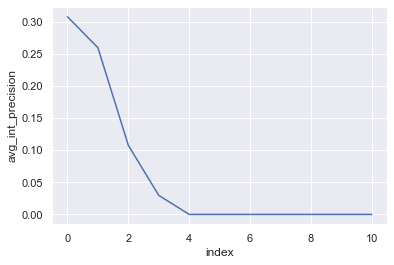

In [273]:
level =[0, 10,20,30,40,50,60,700,80,90,100]
#sns.lineplot(data=result, y="avg_int_precision",x="index")

sns.lineplot(data = result.reset_index(), x = 'index', y = 'avg_int_precision')